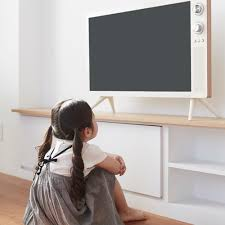

In [1]:
from IPython.display import Image

Image(filename='./folder/download.jpeg', width=200)

## Rate your preference

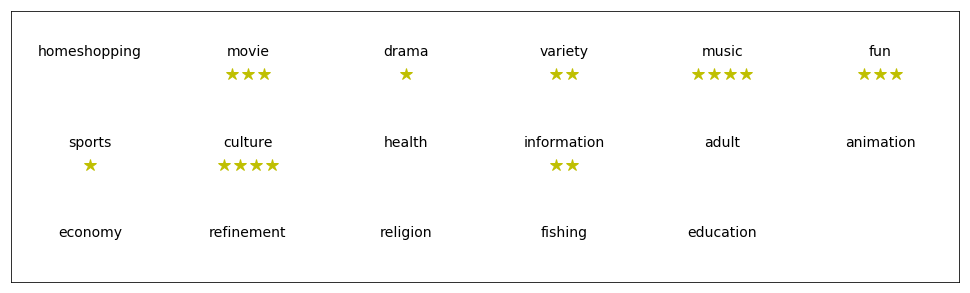

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(17, 5))
ax = plt.gca()

field = ['homeshopping', 'movie', 'drama', 'variety', 'music', 'fun', 'sports', 'culture',
         'health', 'information', 'adult', 'animation', 'economy', 'refinement',
         'religion', 'fishing', 'education']

for i,x in enumerate(field[:6]):
    plt.text(i+0.5, 2.5, x, size=14, ha='center')

for i,x in enumerate(field[6:12]):
    plt.text(i+0.5, 1.5, x, size=14, ha='center')

for i,x in enumerate(field[12:]):
    plt.text(i+0.5, 0.5, x, size=14, ha='center')
    
ax.set_xlim(0, 6)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# 별점 표시
homeshopping = 0; movie = 3; drama = 1;variety = 2;music = 4;fun = 3;sports = 1
culture = 4; health = 0; information = 2; adult = 0; animation = 0; economy = 0
refinement = 0; religion = 0; fishing = 0; education = 0

stars = [homeshopping, movie, drama, variety, music, fun, sports, culture,
         health, information, adult, animation, economy, refinement,
         religion, fishing, education]

for i,star in enumerate(stars):
    if i < 6:
        for x in range(star):
            x = x * 0.1
            line, = ax.plot([i+0.5+x-0.05*(star-1)], [2.3], marker="*", color='y', markersize=12)
    elif i < 12:
        for x in range(star):
            x = x * 0.1
            line, = ax.plot([i-5.5+x-0.05*(star-1)], [1.3], marker="*", color='y', markersize=12)
    else:
        for x in range(star):
            x = x * 0.1
            line, = ax.plot([i-11.5+x-0.05*(star-1)], [0.3], marker="*", color='y', markersize=12)

## Preference based classification

In [3]:
import csv

field_dict = {'homeshopping':homeshopping,'movie':movie,'drama':drama,'variety':variety,
         'music':music,'fun':fun,'sports':sports,'culture':culture,'health':health,
         'information':information,'adult':adult,'animation':animation,
         'economy':economy,'refinement':refinement,'religion':religion,
         'fishing':fishing,'education':education}

channel = []
with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        if line_count == 0:
            print("Channel List\n")
            line_count = 1
        else:
            if field_dict[str(row[2])] != 0:
                print(row[0], row[1], row[2], row[3])
                channel.append(int(row[0])-1)
                
print("\nFirst classification completed")

Channel List

2  movie 
3  movie 
4  drama 
5  culture 
6  variety 
8  music 
9  drama 
10  fun 
11  sports 
12  culture 
13  music 
14  fun 
15  variety 
18  information 
19  information 
21  sports 
22  information 
24  variety 
29  movie 
30  movie 
31  movie 
32  movie 
33  culture 
34  information 
35  culture 
36  culture 
37  variety 
38  variety 
39  variety 
40  information 
41  variety 
42  music 
44  culture 
45  culture 
46  variety 
47  sports 
48  drama 
49  drama 
50  culture 
51  information 
52  culture 
54  movie 
55  information 
56  culture 
57  culture 
58  information 
59  information 
60  information 
61  culture 
62  information 
63  information 
64  information 
66  information 
68  fun 
70  culture 
71  information 
72  information 
73  information 
74  culture 
75  movie 
76  information 
77  information 
78  information 
79  culture 
81  movie 
82  information 
83  sports 
84  information 
85  variety 
86  information 
87  culture 
88  variety 
89  fun 
90  

## Reflect channel ratings

In [4]:
import random

increased_channel = channel.copy()
for x in channel:
    if x < 274:
        for i in range(3):
            increased_channel.append(x)
    else:
        break
        
for i in range(83):
    increased_channel.append(274)
for i in range(91):
    increased_channel.append(275)
for i in range(58):
    increased_channel.append(276)
for i in range(82):
    increased_channel.append(277)
for i in range(13):
    increased_channel.append(278)
for i in range(38):
    increased_channel.append(279)
for i in range(14):
    increased_channel.append(280)
for i in range(22):
    increased_channel.append(281)
for i in range(25):
    increased_channel.append(282)
    
random.shuffle(increased_channel)
print("Real Channel:", len(channel))
print("Increased Channel:", len(increased_channel))
#print(channel)

Real Channel: 218
Increased Channel: 1271


## Data based reward matrix

In [5]:
%matplotlib inline
np.set_printoptions(threshold=np.inf)

def action(state, Q, epsilon, pi_0, N, increased_channel):
    action_direction = np.arange(N)
    if np.random.rand() < epsilon: # 확률 e로 무작위 행동을 선택함
        action = random.choice(increased_channel)
    else: # Q가 알려주는 방향으로 행동을 선택함
        action = action_direction[np.nanargmax(Q[state, :])]
    return action

def next_state(state, action, N): # 다음 상태가 무엇인가
    action_direction = np.arange(N)
    s_next = action_direction[action]  # 현재 action에 따른 다음 상태
    return s_next
    
### 정책 파라미터 theta_0을 무작위 행동 정책 pi로 변환하는 함수
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)
    return pi
    
### Q러닝 알고리즘으로 행동가치 함수 Q를 수정
def Q_learning(state, action, s_next, reward, Q, eta, gamma):
    Q[state, action] = Q[state, action] + eta * (reward + gamma*np.nanmax(Q[s_next,:]) - Q[state, action])
    return Q

def make_reward_data(N, T, increased_channel):
    data = []
    reward_matrix = np.zeros((N,T))
    
    for t in range(T):
        data.append(random.choice(increased_channel))
        label = 0
        
        with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0

            for row in csv_reader:
                if line_count == 0:
                    line_count = 1
                else:
                    if int(row[0]) == (data[t]+1):
                        label = str(row[2])
        
        with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0

            for row in csv_reader:
                if line_count == 0:
                    line_count = 1
                else:
                    if int(row[0]) == (data[t]+1):
                        weight = field_dict[str(row[2])]
                        reward_matrix[data[t],t] += 1 * weight
                    else:
                        if str(row[2]) == label:
                            weight = field_dict[str(row[2])]
                            reward_matrix[int(row[0])-1,t] += 0.1 * weight
    return reward_matrix

reward_matrix = make_reward_data(283, 100, increased_channel)
print(reward_matrix[1, :])

[0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.3
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


## Predict a user's preferred channel

[['5' 'culture']
 ['12' 'culture']
 ['22' 'information']
 ['37' 'variety']
 ['63' 'information']
 ['111' 'information']
 ['133' 'information']
 ['161' 'culture']
 ['162' 'culture']
 ['219' 'information']
 ['237' 'information']
 ['244' 'information']
 ['262' 'culture']
 ['281' 'information']]

Total Reward 임계치: 50.0

# of Movie channels: 24
# of Drama channels: 17
# of Variety channels: 13
# of Music channels: 8
# of Fun channels: 19
# of Sports channels: 16
# of Culture channels: 51
# of Information channels: 70


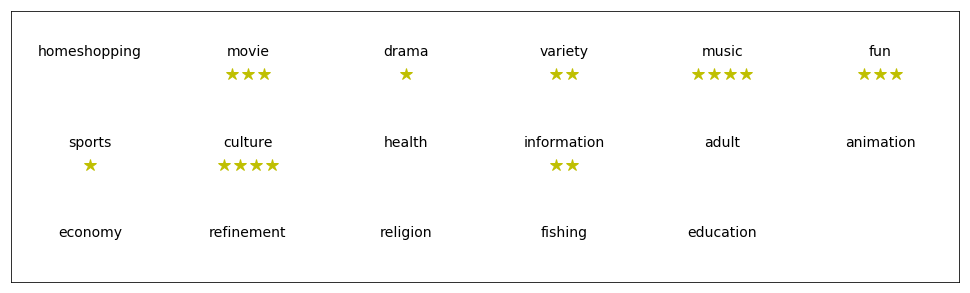

In [7]:
### 테스트 알고리즘
def test_algorithm(reward_matrix, max_epsilon, min_epsilon, eta, gamma, increased_channel, time, threshold):
    N = reward_matrix.shape[0]
    cumulative_rewards = np.zeros(N)
    theta_0 = np.ones((N,N)) #initialize 정책 파라미터 (가능한 정책 모두를 표기)
    pi_0 = simple_convert_into_pi_from_theta(theta_0) #initialize 행동 정책 (가능한 정책을 확률로 표현)
    [a, b] = theta_0.shape
    Q = np.random.rand(a, b) * theta_0 * 0.5
    #Q = np.zeros((N,N))
    channels = []
    state = random.choice(increased_channel)
    decreased_epsilon = max_epsilon
    reward_matrix = np.array(reward_matrix)
    
    for t in range(time):
        chosen_ch = action(state, Q, decreased_epsilon, pi_0, N, increased_channel)
        reward = sum(reward_matrix[state, :] * 0.1) # 과거의 해당 state에 대한 모든 reward 탐색 및 종합
        s_next = chosen_ch
        Q = Q_learning(state, chosen_ch, s_next, reward, Q, eta, gamma)
        stack = np.zeros(N)
        
        with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0

            for row in csv_reader:
                if line_count == 0:
                    line_count = 1
                else:
                    if int(row[0]) == state+1:
                        label = str(row[2])
        
        with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0

            for row in csv_reader:
                if line_count == 0:
                    line_count = 1
                else:
                    if int(row[0]) == state+1:
                        weight = field_dict[str(row[2])]
                        stack[state] = 1 * weight
                    else:
                        if str(row[2]) == label:
                            weight = field_dict[str(row[2])]
                            stack[int(row[0])-1] = 0.1 * weight
                            
        reward_matrix = np.column_stack((reward_matrix, stack)) # reward_matrix update
        state = s_next # state update
        
        if max_epsilon >= min_epsilon:
            decreased_epsilon = decreased_epsilon - (max_epsilon - min_epsilon)/time # epsilon 점차적으로 감소
        else:
            print("Max epsilon should bigger than min epsilon")
            raise RuntimeError
            
        cumulative_rewards[state] += reward
        
    for ch,value in enumerate(cumulative_rewards):
        if value > threshold:
            channels.append(ch)
            
    return channels


N = 283
data = 3000
time = 100

max_epsilon = 0.5
min_epsilon = 0.01
eta = 0.1
gamma = 0.1
threshold = 50.0 #5.0

random.seed(8972)
np.random.seed(8972)
reward_matrix = make_reward_data(N, data, increased_channel)
results = test_algorithm(reward_matrix, max_epsilon, min_epsilon, eta, gamma, increased_channel, time, threshold)


labels = []
for i in results:
    if i not in channel:
        results.remove(i)

for i in results:
    with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0

        for row in csv_reader:
            if line_count == 0:
                line_count = 1
            else:
                if int(row[0]) == (i+1):
                    labels.append(row[2])
                    
for i in range(len(results)):
    results[i] += 1
results = np.array(results)
labels = np.array(labels)
final = np.column_stack((results,labels))
print(final)
print("\nTotal Reward 임계치:", threshold)


aa = []
ab = []
ac = []
ad = []
ae = []
af = []
ag = []
ah = []
with open('./folder/dataset.csv', 'r', encoding='UTF-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        if line_count == 0:
            line_count = 1
        else:
            if str(row[2]) == 'movie':
                aa.append(1)
            elif str(row[2]) == 'drama':
                af.append(1)
            elif str(row[2]) == 'variety':
                ab.append(1)
            elif str(row[2]) == 'culture':
                ac.append(1)
            elif str(row[2]) == 'sports':
                ad.append(1)
            elif str(row[2]) == 'fun':
                ae.append(1)
            elif str(row[2]) == 'music':
                ag.append(1)
            elif str(row[2]) == 'information':
                ah.append(1)
                
print()
print("# of Movie channels:", len(aa))
print("# of Drama channels:", len(af))
print("# of Variety channels:", len(ab))
print("# of Music channels:", len(ag))
print("# of Fun channels:", len(ae))
print("# of Sports channels:", len(ad))
print("# of Culture channels:", len(ac))
print("# of Information channels:", len(ah))

fig1 = plt.figure(figsize=(17, 5))
ax = plt.gca()

for i,x in enumerate(field[:6]):
    plt.text(i+0.5, 2.5, x, size=14, ha='center')

for i,x in enumerate(field[6:12]):
    plt.text(i+0.5, 1.5, x, size=14, ha='center')

for i,x in enumerate(field[12:]):
    plt.text(i+0.5, 0.5, x, size=14, ha='center')
    
ax.set_xlim(0, 6)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

for i,star in enumerate(stars):
    if i < 6:
        for x in range(star):
            x = x * 0.1
            line, = ax.plot([i+0.5+x-0.05*(star-1)], [2.3], marker="*", color='y', markersize=12)
    elif i < 12:
        for x in range(star):
            x = x * 0.1
            line, = ax.plot([i-5.5+x-0.05*(star-1)], [1.3], marker="*", color='y', markersize=12)
    else:
        for x in range(star):
            x = x * 0.1
            line, = ax.plot([i-11.5+x-0.05*(star-1)], [0.3], marker="*", color='y', markersize=12)